# Segmentation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
%matplotlib inline

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [6]:
# Import transcript and segment into sentences 
def sentence_chunk_transcript(transcripts, name_variable='transcript', chunk_size=1):
    """ transcripts: must have two columns - episode_id and transcript
        chunk_size: number of sentences in chunk 
    """
    transcripts["sentence_token"] = transcripts[name_variable].apply(lambda x: sent_tokenize(x, language='english'))
    episode_ls = []
    transcript_ls = []
    sent_enum_ls = []
    for index, row in transcripts.iterrows():
        for i in range(0, len(row["sentence_token"]), chunk_size):
            episode_ls.append(row["episode_id"])
            transcript_ls.append(" ".join(row["sentence_token"][i:i+chunk_size]))
            sent_enum_ls.append(f"{i+1}")
    sentence_chunked_df = pd.DataFrame(data = {'episode_id': episode_ls, 'transcript_subset':transcript_ls, 'sentence_enumerated':sent_enum_ls})
    return sentence_chunked_df

In [20]:
# Load bertopic model and predict topic proba per sentence and put in martix

#Instantiate models
# trunc_svd = TruncatedSVD(n_components=50)
# T_SNE = TSNE(n_components=3, perplexity=1)

mod = BERTopic.load('BERT_mini')
docs = trans.transcript_subset.to_list()

# tsvd_embeddings = trunc_svd.fit_transform(embed_256)
# tsne_dimreduced_embeddings = T_SNE.fit_transform(X=tsvd_embeddings)
topics = mod.transform(docs, embed_256)

def predict_sent_topic(topic_model, transcript, sentence_model="all-MiniLM-L6-v2"):
    # Load model 
    model = BERTopic.load(topic_model)
    docs = transcript.to_list()
    sentence_model = SentenceTransformer(sentence_model)
    # create input data 
    enum_transcript = sentence_chunk_transcript(transcripts=transcript, chunk_size=1)

    embed_new_sents = sentence_model.encode(docs, convert_to_numpy=True)
    _, proba = model.transform(docs, embedding=embed_new_sents)
    
        

    

In [7]:
data = pd.read_csv('transcripts_sample.csv.gz', compression='gzip')[:1]
data.head()

,show_id,episode_id,transcript,avg_confidence,char_count,show_name,show_description,publisher,language,episode_name,episode_description,duration,show_id_trans,category,pubdate,word_count
0,show_74R2UD42MRDtmeCGCpXNHA,7tYqM5F5SKtt7lFgcimgAh,I'm Daniel Williams director of active chicks ...,0.850038,11270,Inspire By Dani - The Podcast,"Real and raw conversations on mental health, f...",Danielle Williams,['en'],The Best Advice My Mum Ever Gave Me,Today’s Episode I chat about what my mother sa...,13.96255,show_74R2UD42MRDtmeCGCpXNHA,Health & Fitness,NaN,2259


In [8]:
trans = sentence_chunk_transcript(data)
trans

,episode_id,transcript_subset,sentence_enumerated
0,7tYqM5F5SKtt7lFgcimgAh,I'm Daniel Williams director of active chicks ...,1
1,7tYqM5F5SKtt7lFgcimgAh,I'm also a mom to five wonderful and crazy kid...,2
2,7tYqM5F5SKtt7lFgcimgAh,This podcast is all about real and raw convers...,3
3,7tYqM5F5SKtt7lFgcimgAh,Welcome to the first official episode of the a...,4
4,7tYqM5F5SKtt7lFgcimgAh,There was so many topics of that I could start...,5
...,...,...,...
90,7tYqM5F5SKtt7lFgcimgAh,But if you could also share this with a friend...,91
91,7tYqM5F5SKtt7lFgcimgAh,That it just helps me to get the word out.,92
92,7tYqM5F5SKtt7lFgcimgAh,Alright.,93
93,7tYqM5F5SKtt7lFgcimgAh,I hope you have an awesome day.,94


In [9]:
trans.transcript_subset[0]

"I'm Daniel Williams director of active chicks Fitness and life coach."

In [11]:
mod = BERTopic.load('BERT_mini')
docs = trans.transcript_subset.to_list()

sentence_model=SentenceTransformer("all-MiniLM-L6-v2")

embed_256 = sentence_model.encode(docs, convert_to_numpy=True)
# tsvd_embeddings = trunc_svd.fit_transform(embed_256)
# tsne_dimreduced_embeddings = T_SNE.fit_transform(X=tsvd_embeddings)
topics, proba = mod.transform(docs, embed_256)

print(topics)

[-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 353, -1, -1, -1, -1, -1, -1, 1, 182, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 255, -1, -1, -1, -1, 74, 244, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 74, -1, -1, -1, -1, -1, -1, -1, 465, -1, -1, -1, -1, -1, -1, 0, -1, -1, 79, 1, -1, 1, 13, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1]


In [22]:
# mod.get_topic_freq()
# mod.get_topic_info()  

In [32]:
## Reduce outliers

new_topics = mod.reduce_outliers(docs, topics, probabilities=proba, strategy="probabilities")

In [33]:
print(new_topics)

[278, 278, 564, 1, 530, 89, 1, 325, 350, 24, 13, 446, 607, 59, 587, 255, 208, 573, 444, 13, 604, 69, 136, 353, 518, 565, 278, 190, 568, 311, 1, 182, 465, 69, 577, 172, 338, 62, 1, 543, 605, 296, 255, 475, 89, 137, 69, 74, 244, 113, 136, 541, 541, 1, 368, 504, 564, 264, 486, 473, 74, 221, 59, 1, 425, 222, 465, 582, 465, 172, 373, 439, 297, 74, 277, 0, 501, 13, 79, 1, 564, 1, 13, 597, 52, 544, 1, 1, 523, 76, 1, 587, 1, 1, 1]


In [28]:
sentence_proba = pd.DataFrame(proba)
# sentence_proba.head(10)
# sentence_proba.head()

idxmax
    idxmax       max
0    278.0  0.132749
1    278.0  0.132749
2    564.0  0.843033
3      1.0  0.674444
4    530.0  0.002699
5     89.0  0.208253
6      1.0  0.009884
7    325.0  0.366409
8    350.0  0.007395
9     24.0  0.047021
10    13.0  0.055918
11   446.0  0.000992
12   607.0  0.992021
13    59.0  0.208686
14   587.0  0.985416
15   255.0  0.803048
16   208.0  0.036413
17   573.0  0.154638
18   444.0  0.019645
19    13.0  0.078085
20   604.0  0.292000
21    69.0  0.414268
22   136.0  0.154748
23   353.0  0.003399
24   518.0  0.005604


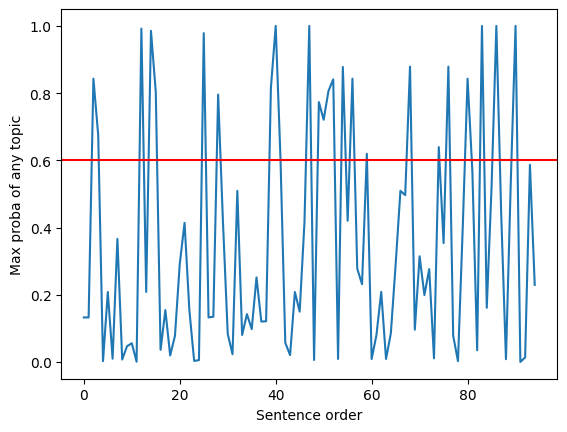

In [25]:
sents = sentence_proba.agg(['idxmax', 'max'], axis=1)
print(sents.columns[0])
print(sents[:25])
sns.lineplot(sents[sents.columns[1]])
plt.ylabel('Max proba of any topic')
plt.xlabel('Sentence order')
plt.axhline(0.6, color='r')
plt.show()

In [34]:
print(len(sents[sents.columns[0]].value_counts()))
sents[sents.columns[0]].value_counts()  

62


1.0      14
13.0      4
278.0     3
564.0     3
465.0     3
         ..
338.0     1
543.0     1
605.0     1
296.0     1
76.0      1
Name: idxmax, Length: 62, dtype: int64